In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import export_graphviz
from sklearn import metrics
import pickle
import sys
%matplotlib inline

In [2]:
libraries = (('Matplotlib', mpl), ('Numpy', np), 
                ('Sklearn', sklearn), ('Seaborn', sns), 
            ('Pandas', pd))

print("Python version:", sys.version, '\n')
for lib in libraries:
    print('{0} version: {1}'.format(lib[0], lib[1].__version__))

Python version: 3.7.1 (default, Dec  7 2018, 07:03:36) 
[Clang 10.0.0 (clang-1000.11.45.2)] 

Matplotlib version: 3.0.1
Numpy version: 1.15.3
Sklearn version: 0.20.0
Seaborn version: 0.9.0
Pandas version: 0.23.4


In [3]:
#Read Data
data = pd.read_csv('../../SynData/data/GeneratedData.csv')


In [4]:
#General data info
data.head()

,CPU,throughput
0,0.196560,17.945073
1,0.121706,11.485114
2,0.081606,7.844668
3,0.963982,67.497399
4,0.174581,16.091151


In [5]:
data.describe()

,CPU,throughput
count,3000.000000,3000.000000
mean,0.500082,38.591760
std,0.291863,19.998605
min,0.000212,0.021177
25%,0.243782,21.815671
50%,0.494015,40.146714
75%,0.758839,56.465367
max,0.999886,69.309028


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
CPU           3000 non-null float64
throughput    3000 non-null float64
dtypes: float64(2)
memory usage: 47.0 KB


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


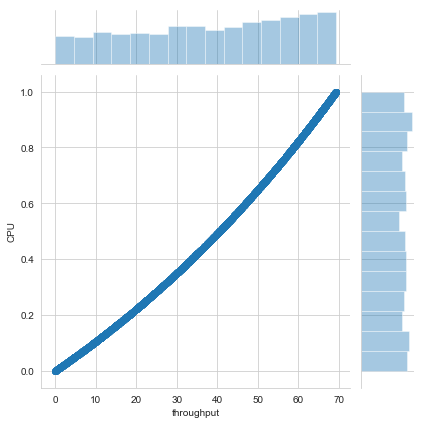

In [7]:
sns.set_style('whitegrid')
sns.jointplot(x=data['throughput'],y=data['CPU'],kind="scatter")


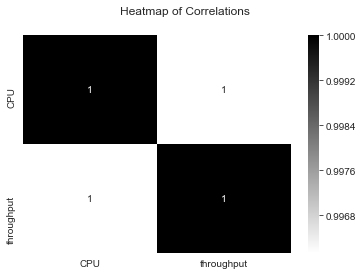

In [22]:
sns.heatmap(data.corr(), cmap='binary', annot=True)
plt.suptitle('Heatmap of Correlations');


In [9]:
data['throughput'].corr(data['CPU'])


0.9961351641631878

In [10]:
datalm = data


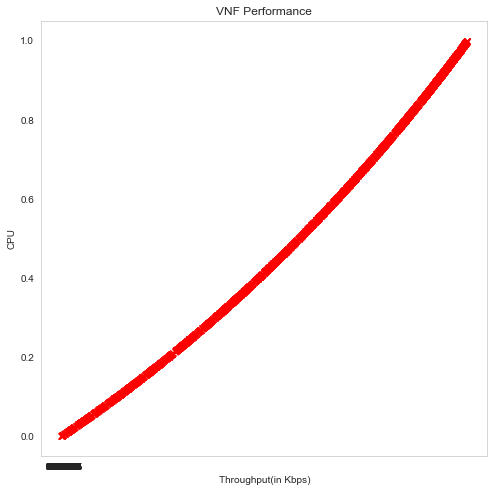

In [17]:
sns.lmplot(x='throughput',y='CPU',data=datalm)


In [ ]:
def k_fold_cross_val(folds, X, y):
    n = len(X)
    kf = KFold(n, n_folds=folds)
    kf_dict = dict([("fold_%s" % i,[]) for i in range(1, folds+1)])
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        print "Fold: %s" % fold
        X_train, X_test = X.ix[train_index], X.ix[test_index]
        y_train, y_test = y.ix[train_index], y.ix[test_index]
        # Increase degree of linear regression polynomial order
        for d in range(1, degrees+1):
            print "Degree: %s" % d
            # Create the model and fit it
            polynomial_features = PolynomialFeatures(
                degree=d, include_bias=False
            )
            linear_regression = LinearRegression()
            model = Pipeline([
                ("polynomial_features", polynomial_features),
                ("linear_regression", linear_regression)
            ])
            model.fit(X_train, y_train)
            # Calculate the test MSE and append to the
            # dictionary of all test curves
            y_pred = model.predict(X_test)
            test_mse = mean_squared_error(y_test, y_pred)
            kf_dict["fold_%s" % fold].append(test_mse)
        # Convert these lists into numpy arrays to perform averaging
        kf_dict["fold_%s" % fold] = np.array(kf_dict["fold_%s" % fold])
    # Create the "average test MSE" series by averaging the 
    # test MSE for each degree of the linear regression model,
    # across each of the k folds.
    kf_dict["avg"] = np.zeros(degrees)
    for i in range(1, folds+1):
        kf_dict["avg"] += kf_dict["fold_%s" % i]
    kf_dict["avg"] /= float(folds)
    return kf_dict


In [18]:
#Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

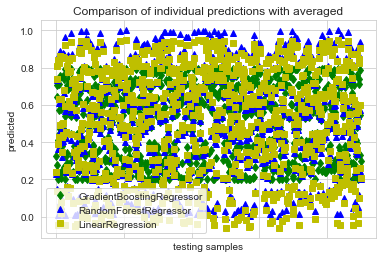

In [19]:
#Plot prediction
plt.figure()
plt.plot(reg1.predict(X_test), 'gd', label='GradientBoostingRegressor')
plt.plot(reg2.predict(X_test), 'b^', label='RandomForestRegressor')
plt.plot(reg3.predict(X_test), 'ys', label='LinearRegression')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('testing samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

In [20]:
#TO-DO Model Evaluation Comparison

#print('MAE:', metrics.mean_absolute_error(y_test, prediction))
#print('MSE:', metrics.mean_squared_error(y_test, prediction))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


